<font color="#CA3532"><h1 align="left">**Aprendizaje por Refuerzo**</h1></font>
<font color="#6E6E6E"><h2 align="left">**Multiarmed Bandits Contextuales**</h2></font>

## **Instrucciones**

Ajusta este notebook (igual que el 1) al nuevo problema, donde tenemos 3 productos y 4 variables de contexto.

In [ ]:
COLAB = True

In [ ]:
!ls

sample_data


In [ ]:
# CAMBIADO:

if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1KjwAKDzggG8FXLj9WajOVKkJWiyyY2l-',
                                        dest_path='./simula_clientes_problema2.py')
    gdd.download_file_from_google_drive(file_id='1ZEYZXdC7GyHXqnt5Wl_orkHmc97vWfGO',
                                        dest_path='./spacebandits.zip', unzip=True)

In [ ]:
import numpy as np
import pandas as pd
from random import random, randint
import matplotlib.pyplot as plt
from tqdm import tqdm

%config InlineBackend.figure_format='retina'
%matplotlib inline

In [ ]:
# CAMBIADO:

from simula_clientes_problema2 import cliente

In [ ]:
c = cliente() # x es una instancia de la clase "cliente", que tengo implementada en simula_clientes_problema1

In [ ]:
# edad, ingresos generados en la compañía hasta ahora
c.get_context()

array([24.  , 88.29, 47.  , 31.  ])

In [ ]:
accion = 2
c.get_reward(accion)

0

### **Estrategia 1: recomendación al azar**

In [ ]:
N = 10000
reward_total = 0
for _ in range(N):
  c = cliente()
  accion = np.random.choice(3)
  reward_total += c.get_reward(accion)

print("Reward promedio:", reward_total/N)

Reward promedio: 6.907


### **Estrategia 2: Multiarmed Bandit contextual**

Instructions for updating:
non-resource variables are not supported in the long term
100%|██████████| 10000/10000 [00:23<00:00, 423.17it/s]


Reward promedio: 13.263


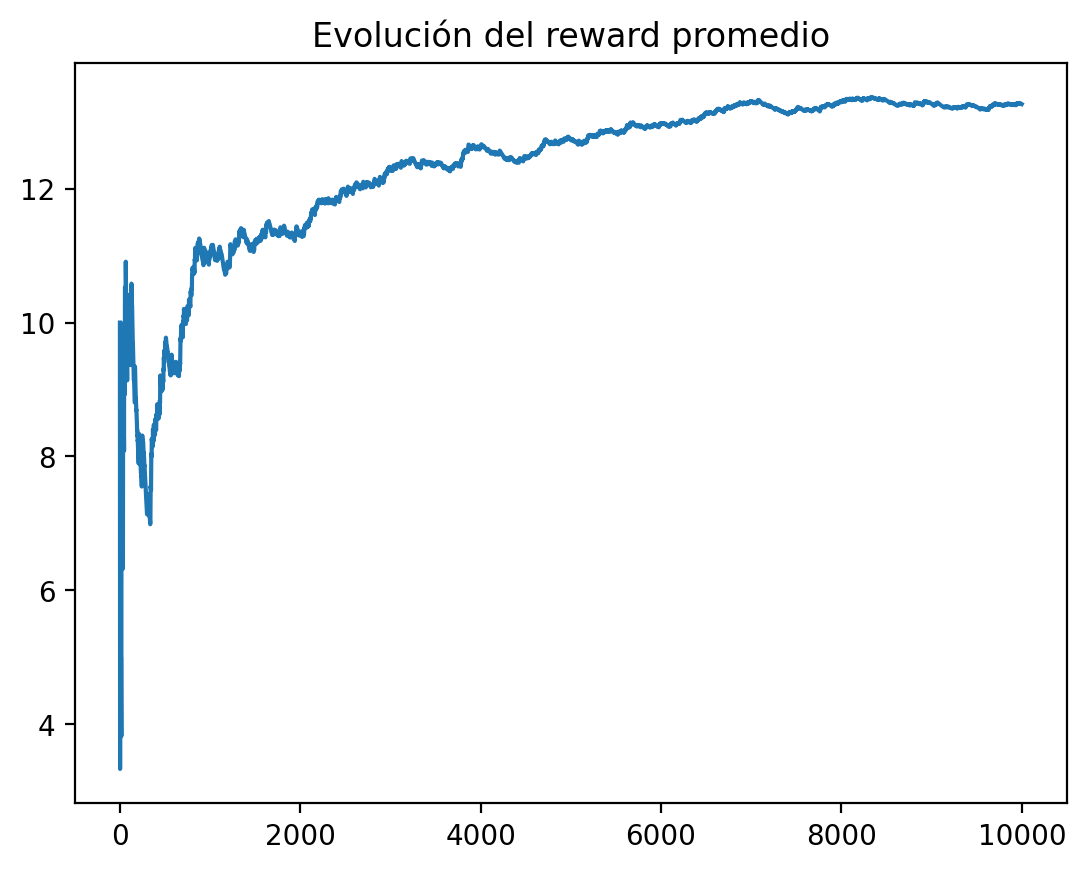

In [ ]:
from space_bandits import LinearBandits

n_acciones = 3 # número de promociones diferentes
n_features = 4 # número de variables de contexto (edad e ingresos generados)

N = 10000

agente = LinearBandits(n_acciones, n_features, initial_pulls=100) # initial_pulls: duración de la fase de exploración pura
reward_promedio = []
reward_total = 0
for i in tqdm(range(N)):
  c = cliente() # cliente con el que contacto
  contexto = c.get_context() # consigo el contexto del cliente
  accion = agente.action(contexto) # choose_action
  reward = c.get_reward(accion) # reward obtenido
  agente.update(contexto, accion, reward) # actualización del modelo

  reward_total += reward
  reward_promedio.append(reward_total/(i+1)) # i+1 es el número de iteraciones

print("Reward promedio:", reward_total/N)
plt.plot(reward_promedio)
plt.title("Evolución del reward promedio");

In [ ]:
c = cliente()

In [ ]:
contexto = c.get_context()
contexto

array([23.  , 95.45, 26.  , 46.  ])

In [ ]:
agente.action(contexto) # Le pido al multiarmed bandit contextual que elija la acción óptima:

0

In [ ]:
agente.expected_values(contexto) # Q(s,a) por cada acción a, y para el cliente s (s=contexto)

array([9.14609522, 1.7139703 , 4.3428159 ])

In [ ]:
# Parámetros que aprende el agente:
# 3 arrays (porque hay 3 acciones posibles, 3 productos)
# En cada array el último elemento es el término constante de un modelo lineal
# Los elementos primero y segundo son los coeficientes de edad e ingresos respectivamente
agente.mu

[array([-1.00989154e-01,  1.60567041e-02, -3.95142360e-03, -2.82880106e-04,
         1.00519829e+01]),
 array([-0.04166662, -0.00969623,  0.02004666,  0.06198999,  0.22505455]),
 array([ 0.44259096, -0.07753055,  0.01966698,  0.00654614,  0.75105121])]

In [ ]:
edad, ingresos_generados, x2, x3 = contexto
edad, ingresos_generados, x2, x3

(23.0, 95.45, 26.0, 46.0)

In [ ]:
agente.mu[0]

array([-1.00989154e-01,  1.60567041e-02, -3.95142360e-03, -2.82880106e-04,
        1.00519829e+01])

In [ ]:
# Valoración Q(s,a), según el modelo lineal, de realizar la
# acción 0 (promoción 0) en ese cliente concreto:
agente.mu[0][-1] + agente.mu[0][0]*edad + agente.mu[0][1]*ingresos_generados + agente.mu[0][2]*x2 + agente.mu[0][3]*x3

9.146095217570135

In [ ]:
# Valoración Q(s,a), según el modelo lineal, de realizar la
# acción 1 (promoción 1) en ese cliente concreto:
agente.mu[1][-1] + agente.mu[1][0]*edad + agente.mu[1][1]*ingresos_generados + agente.mu[1][2]*x2 + agente.mu[1][3]*x3

1.7139702951623597

In [ ]:
# Valoración Q(s,a), según el modelo lineal, de realizar la
# acción 2 (promoción 2) en ese cliente concreto:
agente.mu[2][-1] + agente.mu[2][0]*edad + agente.mu[2][1]*ingresos_generados + agente.mu[2][2]*x2 + agente.mu[2][3]*x3

4.3428158958891885